# Week3 - Homework-GI67216:

Write a rule based predictor for the dataset below. 

Choose one of the following datasets and do your EDA. 
Test your assumptions. 

Finally write your code in `predict_one` function. 

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

### study reference ↴
https://www.w3schools.com/python/

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(in_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6000 non-null   object
 1   gender  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [55]:
df.gender.value_counts()

M    3000
F    3000
Name: gender, dtype: int64

### Two examples:

In [56]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

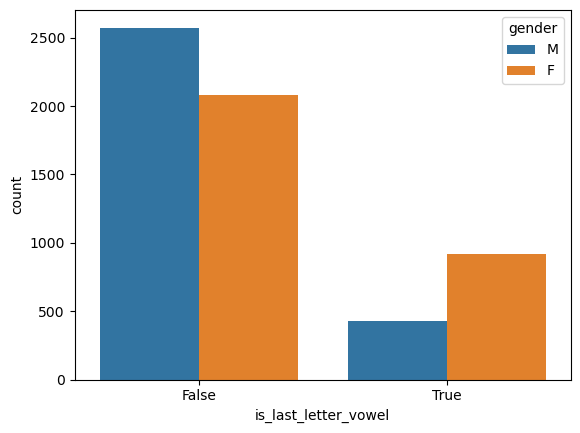

In [57]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<Axes: xlabel='len', ylabel='count'>

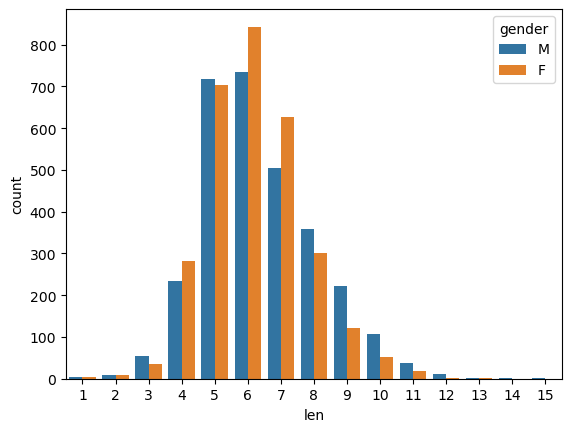

In [58]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

In [59]:
def predict_one(name):
    # your code
    # the main assumption here would be vowels at the end of a name, in India we mostly recognise a person's name as male or female by the ending sound or letter of there name...
    # so I tried to get the accuracy with this belief...
   
   
    name = name.lower()
  # ↑ we will use this to Convert the name to lowercase for case-sensitive matching in the dataframe.... 
   
    last_letters = name[-1]
  # ↑ we will use this variable to retrive the last letter of the name from dataframe....
    
    
    if (last_letters) in ['a', 'e', 'i', 'o', 'u']:
        return 'F'  
    else:
        return 'M'  

    return 'F'


# i return M and F as per the instruuction given in the question...

####  sample narrative ↴
in this predict one function we firstly define the last letter with the slicing method and before that we put all the case sensitive name in to the lower form to easily comapre it. Then after we will define if else function to defferentiate all name for male and female with vowels and return it. Then we will use predict_one function to find accuracy.

In [60]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7506666666666667


#### :
here we can see that the accuracy is good as compare to above examples, so we can use this further.